# Mining Challenge Sample Notebook

This notebook gives a small example of working with our data.

## Imports and Database Connection

In [1]:
import re
from mongoengine import connect, disconnect
from pycoshark.mongomodels import Project, VCSSystem, Commit, FileAction, Hunk, Refactoring, IssueSystem, Issue, IssueComment, MailingList, Message,PullRequestSystem
from pycoshark.utils import create_mongodb_uri_string


# You may have to update this dict to match your DB credentials
disconnect()
credentials = {'db_user': '',
               'db_password': '',
               'db_hostname': 'localhost',
               'db_port': 27017,
               'db_authentication_database': '',
               'db_ssl_enabled': False}

uri = create_mongodb_uri_string(**credentials)

connect('smartshark_2_1', host=uri, alias='default')

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True, read_preference=Primary())

In [4]:
projects = Project.objects.all()
print(projects.count())
for p in projects:
    print(p.name)

77
commons-math
ant-ivy
kafka
zeppelin
mahout
struts
opennlp
pig
calcite
cayenne
falcon
kylin
nutch
parquet-mr
tika
wss4j
archiva
deltaspike
jspwiki
xerces2-j
tez
systemml
storm
lens
commons-lang
pdfbox
flume
nifi
knox
derby
commons-collections
commons-beanutils
commons-codec
commons-compress
commons-configuration
commons-digester
commons-imaging
commons-io
commons-jcs
commons-jexl
commons-rdf
commons-scxml
commons-validator
commons-vfs
giraph
manifoldcf
ranger
eagle
commons-bcel
commons-dbcp
zookeeper
phoenix
gora
santuario-java
helix
jena
httpcomponents-client
httpcomponents-core
streams
samza
roller
mina-sshd
bigtop
jackrabbit
oozie
activemq
maven
openjpa
directory-fortress-core
directory-studio
xmlgraphics-batik
curator
directory-kerby
fineract
cxf-fediz
freemarker
openwebbeans


In [10]:
commit_id = []
giraph = Project.objects(name='giraph').get()

for fa in FileAction.objects.all():
    if fa.induces != [] :
        for i in fa.induces:
            if i['szz_type'] == 'inducing':
                commit = Commit.objects(id=fa.commit_id).get()
                vcs_system = VCSSystem.objects(id=commit.vcs_system_id, project_id=giraph.id)
                if vcs_system and commit.id not in commit_id:
                    commit_id.append(commit.id)
                    print(commit.id)

print("Number of total bug inducing commits: " + str(len(commit_id)))

5bf51c33d2f8190d8bf3baee
5bf51c34d2f8190d87f3bafa
5bf51c36d2f8190da1f3bb04
5bf51c35d2f8190da5f3bafe
5bf51c37d2f8190dadf3bb0d
5bf51c3bd2f8190d9bf3bb36
5bf51c3cd2f8190d87f3bb42
5bf51c3bd2f8190d8df3bb37
5bf51c3bd2f8190d88f3bb40
5bf51c3cd2f8190d97f3bb60
5bf51c3dd2f8190d99f3bb5c
5bf51c3cd2f8190d87f3bb4d
5bf51c3dd2f8190d94f3bb68
5bf51c3bd2f8190dadf3bb3c
5bf51c3ed2f8190d89f3bbcf
5bf51c3fd2f8190d8bf3bb9f
5bf51c3dd2f8190d8df3bb5e
5bf51c3fd2f8190da1f3bb99
5bf51c3fd2f8190d85f3bb95
5bf51c3ed2f8190d88f3bb8d
5bf51c40d2f8190d89f3bbf5
5bf51c40d2f8190d9bf3bb85
5bf51c3dd2f8190da7f3bb67
5bf51c40d2f8190d85f3bb9e
5bf51c3fd2f8190d93f3bba4
5bf51c43d2f8190d85f3bbe6
5bf51c42d2f8190d89f3bc24
5bf51c40d2f8190d9bf3bb8b
5bf51c3fd2f8190d94f3bba2
5bf51c41d2f8190da1f3bbe8
5bf51c43d2f8190da7f3bc20
5bf51c44d2f8190d87f3bc2f
5bf51c44d2f8190d8af3bc2d
5bf51c45d2f8190d8ff3bc91
5bf51c41d2f8190d9ef3bbd1
5bf51c47d2f8190da1f3bcc3
5bf51c49d2f8190d89f3bccc
5bf51c45d2f8190d8bf3bc2e
5bf51c49d2f8190d93f3bca0
5bf51c48d2f8190da7f3bcac


5bf51ca1d2f8190d88f3c458
5bf51ca2d2f8190d89f3c4c9
5bf51ca2d2f8190d8af3c573
5bf51ca4d2f8190d9ef3c703
5bf51ca6d2f8190d85f3c423
5bf51ca6d2f8190d8bf3c463
5bf51ca5d2f8190dadf3c4dc
5bf51ca7d2f8190d88f3c491
5bf51ca7d2f8190d99f3c535
5bf51ca7d2f8190d9df3c458
5bf51ca8d2f8190d9ef3c72b
5bf51ca9d2f8190d88f3c4a7
5bf51ca8d2f8190d8af3c5e0
5bf51ca8d2f8190d99f3c53e
5bf51ca9d2f8190d9ef3c734
5bf51ca9d2f8190d89f3c509
5bf51ca9d2f8190d8af3c5f6
5bf51caad2f8190d8bf3c492
5bf51ca9d2f8190d8df3c480
5bf51ca9d2f8190d93f3c4ad
5bf51ca9d2f8190d94f3c3e8
5bf51ca9d2f8190d97f3c508
5bf51ca7d2f8190da7f3c54a
5bf51ca0d2f8190d87f3c3bc
5bf51caad2f8190d93f3c4b3
5bf51caad2f8190d99f3c57d
5bf51cabd2f8190d8bf3c49b
5bf51cadd2f8190d99f3c597
5bf51cadd2f8190d8df3c4a1
5bf51caed2f8190dadf3c549
5bf51cafd2f8190d8df3c4aa
5bf51c8ed2f8190d90f3c153
5bf51cb0d2f8190da7f3c5cd
5bf51cb2d2f8190d8bf3c4e8
5bf51cacd2f8190d93f3c4c7
5bf51caed2f8190d94f3c41e
5bf51caed2f8190d9ef3c7b0
5bf51cb2d2f8190dadf3c582
5bf51cb2d2f8190d89f3c568
5bf51cb2d2f8190d8bf3c4ee


KeyboardInterrupt: 

In [12]:
from pycoshark.mongomodels import PullRequest, PullRequestCommit

my_dict = []

print("Number of total bug inducing commits in giraph: " + str(len(commit_id)))
pull_request_system = PullRequestSystem.objects(project_id=giraph.id).get()
pr = PullRequest.objects(pull_request_system_id=pull_request_system.id)
print("Number of pull-request in the project: " + str(pr.count()))

for item in pr:
    pr_commit = PullRequestCommit.objects(pull_request_id=item.id)
    for value in pr_commit:
        if value.commit_id in commit_id:
            
            for key in my_dict:
                if key["pull_request"] == item.id:
                    key["commit_count"] += 1
            else:
                dict = {"pull_request":item.id,
                       "commit_count": 1,
                       "time_difference": item.updated_at - item.created_at}
                my_dict.append(dict)
                                             


print(len(my_dict))
        

Number of total bug inducing commits in giraph: 396
Number of pull-request in the project: 146
40


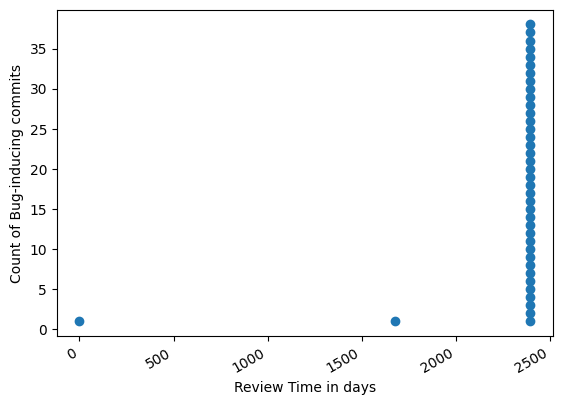

In [13]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import numpy as np

x = []
y = []
for item in my_dict:
    x.append(item["time_difference"].days)
    y.append(item["commit_count"])

plt.scatter(x,y)    
plt.gcf().autofmt_xdate()
plt.xlabel("Review Time in days")
plt.ylabel("Count of Bug-inducing commits")
plt.show()
    

## Working with commits

In [26]:
# We first need the the project from the database
project = Project.objects(name='commons-math').get()

# We now select the version control system of the project
vcs_system = VCSSystem.objects(project_id=project.id).get()


print('VCS System:', vcs_system.url)

# We can now fetch the commits and analyze them
num_commits = Commit.objects(vcs_system_id=vcs_system.id).count()

print('Number of commits:', num_commits)

count_bugfix = 0
count_linked_issue = 0
count_hunks = 0
count_refactorings_refdiff = 0
count_refactorings_refactoringminer = 0

# Only limits the fields we are reading to the required fields. This is important for the performance.
for commit in Commit.objects(vcs_system_id=vcs_system.id).only('labels', 'linked_issue_ids'):
    if commit.labels is not None and 'validated_bugfix' in commit.labels and commit.labels['validated_bugfix']==True:
        count_bugfix += 1
    if commit.linked_issue_ids is not None and len(commit.linked_issue_ids)>0:
        count_linked_issue += 1
        
    # File actions group all changed hunks in a commit of the same file
    for fa in FileAction.objects(commit_id=commit.id):
        count_hunks += Hunk.objects(file_action_id=fa.id).count()
        
    count_refactorings_refdiff += Refactoring.objects(commit_id=commit.id, detection_tool='"refDiff"').count()
    count_refactorings_refactoringminer += Refactoring.objects(commit_id=commit.id, detection_tool='rMiner').count()

        
print('Number of bug fixing commits:', count_bugfix)
print('Number of commits that link to a Jira issue:', count_linked_issue)
print('Number of hunks for all commits:', count_hunks)
print('Number of refactorings detected by refDiff:', count_refactorings_refdiff)
print('Number of refactorings detected by RefactoringMiner:', count_refactorings_refactoringminer)

VCS System: https://github.com/apache/commons-math
Number of commits: 7222
Number of bug fixing commits: 396
Number of commits that link to a Jira issue: 2124
Number of hunks for all commits: 147433
Number of refactorings detected by refDiff: 0
Number of refactorings detected by RefactoringMiner: 14042


## Working with issues

In [27]:
# We first need the the project from the database
project = Project.objects(name='giraph').get()

# We now select the issue tracking system of the project
# Please note that some projects have multiple issue trackers
# In this case get() would fail and you would need to loop over them
issue_tracker = IssueSystem.objects(project_id=project.id).get()

print('Issue Tracker:', issue_tracker.url)

# we can now work with the issues
num_issues = Issue.objects(issue_system_id=issue_tracker.id).count()

print('Number of issues:', num_issues)

count_comments = 0
count_referenced_by_commits = 0
count_bugs_dev_label = 0
count_bugs_validated = 0

for issue in Issue.objects(issue_system_id=issue_tracker.id):
    count_comments += IssueComment.objects(issue_id=issue.id).count()
    if issue.issue_type is not None and issue.issue_type.lower()=='bug':
        count_bugs_dev_label += 1
    if issue.issue_type_verified is not None and issue.issue_type_verified.lower()=='bug':
        count_bugs_validated += 1
    if Commit.objects(linked_issue_ids=issue.id).count()>0:
        count_referenced_by_commits += 1
        
print('Number of comments in discussions:', count_comments)
print('Number of issues referenced by commits:', count_referenced_by_commits)
print('Number of issues labeled as bugs by developers:', count_bugs_dev_label)
print('Number of issues labeled validated as bug by researchers:', count_bugs_validated)

Issue Tracker: https://issues.apache.org/jira/rest/api/2/search?jql=project=GIRAPH
Number of issues: 1232
Number of comments in discussions: 6759
Number of issues referenced by commits: 787
Number of issues labeled as bugs by developers: 534
Number of issues labeled validated as bug by researchers: 140


## Working with the Mailing List

In [4]:
# We first need the the project from the database
project = Project.objects(name='giraph').get()

# We now select the mailing list of the project
# Since we have two mailing lists, we need to loop over them
mailing_lists = MailingList.objects(project_id=project.id)
for mailing_list in mailing_lists:
    print('Mailing List:', mailing_list.name)

    # We can now access the messages
    count_emails = Message.objects(mailing_list_id=mailing_list.id).count()

    print('Number of Emails:', count_emails)

    count_references_jira = 0
    
    jira_id = re.compile('GIRAPH-[0-9]+', re.I | re.M)
    for message in Message.objects(mailing_list_id=mailing_list.id):
        if message.body is not None and jira_id.search(message.body):
            count_references_jira += 1
            
    print('Number of emails that reference a Jira issue:', count_references_jira)

Mailing List: http://mail-archives.apache.org/mod_mbox/giraph-dev
Number of Emails: 12872
Number of emails that reference a Jira issue: 10750
Mailing List: http://mail-archives.apache.org/mod_mbox/giraph-user
Number of Emails: 3742
Number of emails that reference a Jira issue: 902


In [2]:
commit_id_k = []
kafka = Project.objects(name='kafka').get()

for fa in FileAction.objects.all():
    if fa.induces != [] :
        for i in fa.induces:
            if i['szz_type'] == 'inducing':
                commit_k = Commit.objects(id=fa.commit_id).get()
                vcs_system = VCSSystem.objects(id=commit_k.vcs_system_id, project_id=kafka.id)
                if vcs_system and commit_k.id not in commit_id_k:
                    commit_id_k.append(commit_k.id)
                    print(commit_k.id)

5b0fc400065f3902048de36e
5b0fc400065f3902058de36e
5b0fc400065f39020a8de383
5b0fc400065f3902108de37a
5b0fc400065f3902128de374
5b0fc401065f3902018de456
5b0fc401065f3902018de45d
5b0fc401065f3902058de3b5
5b0fc401065f3902058de3e3
5b0fc401065f3902068de389
5b0fc401065f3902088de3a9
5b0fc401065f39020a8de399
5b0fc401065f39020b8de3ca
5b0fc401065f39020d8de38a
5b0fc401065f3902118de43e
5b0fc401065f3902128de42a
5b0fc402065f3902048de420
5b0fc402065f3902068de49b
5b0fc402065f3902078de3eb
5b0fc402065f3902078de472
5b0fc402065f3902088de48a
5b0fc402065f3902088de4a4
5b0fc402065f3902088de4b8
5b0fc402065f3902098de494
5b0fc402065f3902098de4c0
5b0fc402065f39020a8de40e
5b0fc402065f39020a8de48a
5b0fc402065f39020a8de4a7
5b0fc402065f39020b8de450
5b0fc402065f39020b8de4ee
5b0fc402065f39020d8de4ff
5b0fc402065f39020d8de51a
5b0fc402065f39020e8de4c0
5b0fc402065f39020f8de463
5b0fc402065f3902108de46e
5b0fc402065f3902108de52c
5b0fc402065f3902118de4fe
5b0fc402065f3902128de4fa
5b0fc402065f3902128de532
5b0fc403065f3902018de530


5b0fc40c065f39020f8decb7
5b0fc40c065f3902108deb36
5b0fc40c065f3902108deb43
5b0fc40c065f3902108deb6b
5b0fc40c065f3902108deb7d
5b0fc40c065f3902108deb93
5b0fc40c065f3902118de9e2
5b0fc40c065f3902118de9ee
5b0fc40c065f3902118dea12
5b0fc40b065f3902128deb80
5b0fc40c065f3902128debdd
5b0fc40c065f3902128debfa
5b0fc40c065f3902128dec33
5b0fc40c065f3902128dec8c
5b0fc40c065f3902128dec9f
5b0fc40c065f3902128deca5
5b0fc40d065f3902018deaa5
5b0fc40d065f3902018deafa
5b0fc40d065f3902018deb15
5b0fc40d065f3902018deb2f
5b0fc40d065f3902018deb52
5b0fc40d065f3902018deb63
5b0fc40d065f3902018deb69
5b0fc40d065f3902018deb89
5b0fc40c065f3902028debf7
5b0fc40d065f3902028dec04
5b0fc40d065f3902028dec1d
5b0fc40d065f3902028dec34
5b0fc40d065f3902028dec50
5b0fc40d065f3902028dec63
5b0fc40d065f3902028dec9a
5b0fc40d065f3902048df008
5b0fc40d065f3902058decc6
5b0fc40d065f3902058decee
5b0fc40d065f3902058ded42
5b0fc40d065f3902058ded4e
5b0fc40c065f3902068dea61
5b0fc40d065f3902068dea6e
5b0fc40d065f3902068dea76
5b0fc40d065f3902068dea97


5b0fc411065f3902058df17f
5b0fc411065f3902068df11b
5b0fc411065f3902068df12b
5b0fc411065f3902068df147
5b0fc411065f3902068df177
5b0fc411065f3902078df09d
5b0fc411065f3902078df0c7
5b0fc411065f3902078df0d0
5b0fc410065f3902088df0a4
5b0fc411065f3902088df118
5b0fc411065f3902088df124
5b0fc411065f3902088df158
5b0fc411065f3902088df1d3
5b0fc411065f3902098df14d
5b0fc411065f3902098df156
5b0fc411065f3902098df15f
5b0fc411065f3902098df168
5b0fc411065f3902098df17d
5b0fc411065f3902098df1c1
5b0fc411065f3902098df1d0
5b0fc411065f39020a8deeef
5b0fc411065f39020a8def10
5b0fc411065f39020a8def23
5b0fc411065f39020a8def3e
5b0fc410065f39020b8df070
5b0fc411065f39020b8df1b5
5b0fc411065f39020b8df1c0
5b0fc410065f39020d8df10c
5b0fc411065f39020d8df13e
5b0fc411065f39020d8df1b1
5b0fc411065f39020e8defbc
5b0fc411065f39020e8df000
5b0fc411065f39020e8df038
5b0fc411065f39020f8df1b0
5b0fc411065f3902108df227
5b0fc411065f3902108df25c
5b0fc411065f3902108df264
5b0fc411065f3902108df2ae
5b0fc411065f3902118defa4
5b0fc411065f3902118deffc


5b0fc417065f3902098df8d0
5b0fc417065f3902098df8fd
5b0fc417065f39020a8df4da
5b0fc417065f39020a8df51c
5b0fc417065f39020a8df523
5b0fc417065f39020a8df59d
5b0fc417065f39020a8df5b7
5b0fc417065f39020b8df70c
5b0fc417065f39020b8df718
5b0fc417065f39020b8df727
5b0fc417065f39020b8df787
5b0fc417065f39020b8df799
5b0fc417065f39020b8df7a8
5b0fc416065f39020d8df6a3
5b0fc417065f39020d8df73b
5b0fc417065f39020d8df741
5b0fc417065f39020d8df775
5b0fc417065f39020f8df7a8
5b0fc417065f39020f8df7b1
5b0fc417065f39020f8df7d2
5b0fc417065f3902108df92e
5b0fc417065f3902108dfa4e
5b0fc417065f3902108dfa5b
5b0fc417065f3902108dfa62
5b0fc417065f3902108dfaa9
5b0fc416065f3902118df56a
5b0fc417065f3902118df588
5b0fc417065f3902118df5a9
5b0fc417065f3902118df5be
5b0fc417065f3902118df644
5b0fc417065f3902118df663
5b0fc417065f3902118df679
5b0fc417065f3902118df682
5b0fc417065f3902128df887
5b0fc417065f3902128df8bf
5b0fc418065f3902018df9e8
5b0fc418065f3902018df9fb
5b0fc418065f3902018dfa59
5b0fc418065f3902028df8df
5b0fc418065f3902028df9cd


5b0fc41d065f3902028dff94
5b0fc41d065f3902028dff9f
5b0fc41d065f3902028dffcf
5b0fc41d065f3902028dffe0
5b0fc41d065f3902058dfedd
5b0fc41d065f3902068dff3a
5b0fc41d065f3902068dff54
5b0fc41d065f3902068dff6d
5b0fc41d065f3902098dff07
5b0fc41d065f3902098dff0d
5b0fc41d065f3902098dff13
5b0fc41d065f3902098dff43
5b0fc41d065f3902098dff4c
5b0fc41d065f3902098dff59
5b0fc41c065f39020a8dfab0
5b0fc41d065f39020a8dfac4
5b0fc41d065f39020a8dfb16
5b0fc41d065f39020a8dfb1d
5b0fc41d065f39020a8dfb23
5b0fc41d065f39020b8dff0e
5b0fc41d065f39020b8dff42
5b0fc41d065f39020b8dff48
5b0fc41d065f39020b8dff66
5b0fc41d065f39020b8dff80
5b0fc41d065f39020b8dff88
5b0fc41d065f39020d8dfe3f
5b0fc41d065f39020d8dfe7e
5b0fc41d065f39020d8dfe9b
5b0fc41d065f39020e8dff24
5b0fc41d065f39020e8dff2b
5b0fc41d065f3902108e015e
5b0fc41d065f3902108e0176
5b0fc41d065f3902108e01b1
5b0fc41e065f3902018e02b4
5b0fc41e065f3902018e032d
5b0fc41e065f3902018e0333
5b0fc41e065f3902018e0358
5b0fc41d065f3902028e0038
5b0fc41e065f3902028e0094
5b0fc41e065f3902028e00a8


5b0fc427065f3902068e0f6f
5b0fc427065f3902078e0ab6
5b0fc427065f3902078e0acd
5b0fc427065f3902078e0ad4
5b0fc427065f3902078e0b59
5b0fc427065f3902098e0c73
5b0fc427065f3902098e0d9b
5b0fc427065f39020a8e06cc
5b0fc427065f39020a8e0710
5b0fc427065f39020b8e0c2b
5b0fc427065f39020b8e0ca5
5b0fc427065f39020b8e0caf
5b0fc427065f39020e8e0cc1
5b0fc427065f3902108e10a4
5b0fc427065f3902108e1156
5b0fc427065f3902108e1240
5b0fc427065f3902118e09f3
5b0fc427065f3902128e0fbf
5b0fc427065f3902128e1015
5b0fc428065f3902048e108f
5b0fc428065f3902048e1105
5b0fc427065f3902068e0f75
5b0fc428065f3902068e104a
5b0fc428065f3902068e107d
5b0fc427065f3902078e0ba9
5b0fc428065f3902078e0bfe
5b0fc428065f3902078e0cb9
5b0fc427065f3902098e0dbe
5b0fc428065f3902098e0f18
5b0fc428065f39020a8e0801
5b0fc427065f39020d8e0a65
5b0fc428065f39020d8e0ac4
5b0fc428065f39020d8e0ad4
5b0fc428065f39020d8e0b09
5b0fc428065f39020e8e0f21
5b0fc428065f3902108e1286
5b0fc428065f3902118e0abe
5b0fc428065f3902118e0aca
5b0fc429065f3902018e10a9
5b0fc429065f3902018e10d4


5b0fc432065f3902018e1ed1
5b0fc432065f3902028e1c04
5b0fc432065f3902028e1c1f
5b0fc432065f3902028e1cf1
5b0fc432065f3902028e1d3d
5b0fc432065f3902048e1eff
5b0fc432065f3902058e1722
5b0fc432065f3902068e2088
5b0fc432065f3902068e2121
5b0fc432065f3902078e160d
5b0fc432065f3902078e162e
5b0fc432065f3902078e173e
5b0fc432065f3902088e1c8c
5b0fc432065f3902088e1d12
5b0fc432065f3902088e1d38
5b0fc432065f3902088e1d51
5b0fc432065f3902098e1ec4
5b0fc432065f3902098e1ef1
5b0fc432065f3902098e205c
5b0fc432065f39020a8e137e
5b0fc431065f39020d8e189d
5b0fc432065f39020d8e18d1
5b0fc432065f39020d8e19e0
5b0fc432065f39020e8e1d97
5b0fc432065f39020e8e1da2
5b0fc432065f39020e8e1e65
5b0fc432065f39020e8e1e9b
5b0fc432065f39020f8e193f
5b0fc432065f39020f8e1953
5b0fc432065f39020f8e197d
5b0fc432065f39020f8e1992
5b0fc432065f3902108e2483
5b0fc431065f3902118e1853
5b0fc432065f3902118e1989
5b0fc432065f3902128e1dd2
5b0fc432065f3902128e1df6
5b0fc432065f3902128e1e08
5b0fc432065f3902128e1efa
5b0fc432065f3902128e1f43
5b0fc433065f3902018e1f20


5b0fc43c065f39020d8e26b2
5b0fc43c065f39020e8e2b9f
5b0fc43c065f39020e8e2bdd
5b0fc43c065f39020e8e2bf3
5b0fc43b065f3902118e2750
5b0fc43c065f3902118e277d
5b0fc43c065f3902118e2807
5b0fc43c065f3902128e2b93
5b0fc43c065f3902128e2c41
5b0fc43c065f3902128e2c62
5b0fc43d065f3902018e2db9
5b0fc43d065f3902018e2de5
5b0fc43d065f3902018e2e34
5b0fc43d065f3902018e2e59
5b0fc43d065f3902018e2e84
5b0fc43d065f3902028e2995
5b0fc43d065f3902028e29a9
5b0fc43d065f3902028e29ff
5b0fc43c065f3902048e2b5b
5b0fc43d065f3902068e344c
5b0fc43d065f3902068e34ee
5b0fc43d065f3902068e3523
5b0fc43d065f3902088e2bc5
5b0fc43d065f39020a8e2337
5b0fc43d065f39020a8e23fd
5b0fc43c065f3902128e2c96
5b0fc43d065f3902128e2dab
5b0fc43e065f3902018e2f0b
5b0fc43e065f3902018e2f9a
5b0fc43e065f3902028e2b69
5b0fc43e065f3902028e2c24
5b0fc43e065f3902048e2d23
5b0fc43e065f3902068e368b
5b0fc43e065f3902068e36cf
5b0fc43e065f3902098e2e0d
5b0fc43e065f3902098e2e5b
5b0fc43e065f39020d8e2aa8
5b0fc43e065f39020d8e2b80
5b0fc43e065f39020e8e2e64
5b0fc43e065f39020e8e2e8d


KeyboardInterrupt: 

In [4]:
from pycoshark.mongomodels import PullRequest, PullRequestCommit
print("Number of total bug inducing commits in kafka: " + str(len(commit_id_k)))
pull_request_system_k = PullRequestSystem.objects(project_id=kafka.id).get()
pr_k = PullRequest.objects(pull_request_system_id=pull_request_system_k.id)
print("Number of pull-request in the project kafka: " + str(pr_k.count()))

my_dict_kafka = []
for item in pr_k:
    pr_commit_k = PullRequestCommit.objects(pull_request_id=item.id)
    for value in pr_commit_k:
        if value.commit_id in commit_id_k:
            
            for key in my_dict_kafka:
                if key["pull_request"] == item.id:
                    key["commit_count"] += 1
            else:
                dict = {"pull_request":item.id,
                       "commit_count": 1,
                       "time_difference": item.updated_at - item.created_at}
                my_dict_kafka.append(dict)
print(my_dict_kafka)

Number of total bug inducing commits in kafka: 2480
Number of pull-request in the project kafka: 9833
[{'pull_request': ObjectId('5ff371326f08a16999015370'), 'commit_count': 20, 'time_difference': datetime.timedelta(seconds=16)}, {'pull_request': ObjectId('5ff371326f08a16999015370'), 'commit_count': 19, 'time_difference': datetime.timedelta(seconds=16)}, {'pull_request': ObjectId('5ff371326f08a16999015370'), 'commit_count': 18, 'time_difference': datetime.timedelta(seconds=16)}, {'pull_request': ObjectId('5ff371326f08a16999015370'), 'commit_count': 17, 'time_difference': datetime.timedelta(seconds=16)}, {'pull_request': ObjectId('5ff371326f08a16999015370'), 'commit_count': 16, 'time_difference': datetime.timedelta(seconds=16)}, {'pull_request': ObjectId('5ff371326f08a16999015370'), 'commit_count': 15, 'time_difference': datetime.timedelta(seconds=16)}, {'pull_request': ObjectId('5ff371326f08a16999015370'), 'commit_count': 14, 'time_difference': datetime.timedelta(seconds=16)}, {'pull_r

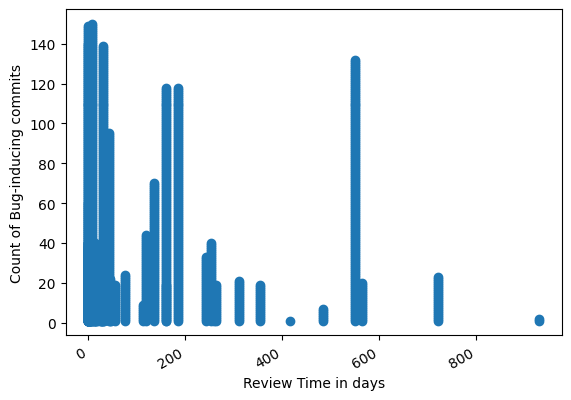

In [21]:
x = []
y = []
for item in my_dict_kafka:
    x.append(item["time_difference"].days)
    y.append(item["commit_count"])

plt.scatter(x,y)    
plt.gcf().autofmt_xdate()
plt.xlabel("Review Time in days")
plt.ylabel("Count of Bug-inducing commits")
plt.show()

In [22]:


# We now select the version control system of the project
vcs_system = VCSSystem.objects(project_id=kafka.id).get()


print('VCS System:', vcs_system.url)

# We can now fetch the commits and analyze them
num_commits = Commit.objects(vcs_system_id=vcs_system.id).count()

print('Number of commits:', num_commits)

count_bugfix = 0
count_linked_issue = 0
count_hunks = 0
count_refactorings_refdiff = 0
count_refactorings_refactoringminer = 0

# Only limits the fields we are reading to the required fields. This is important for the performance.
for commit in Commit.objects(vcs_system_id=vcs_system.id).only('labels', 'linked_issue_ids'):
    if commit.labels is not None and 'validated_bugfix' in commit.labels and commit.labels['validated_bugfix']==True:
        count_bugfix += 1
    if commit.linked_issue_ids is not None and len(commit.linked_issue_ids)>0:
        count_linked_issue += 1
        
    # File actions group all changed hunks in a commit of the same file
    for fa in FileAction.objects(commit_id=commit.id):
        count_hunks += Hunk.objects(file_action_id=fa.id).count()
        
    count_refactorings_refdiff += Refactoring.objects(commit_id=commit.id, detection_tool='"refDiff"').count()
    count_refactorings_refactoringminer += Refactoring.objects(commit_id=commit.id, detection_tool='rMiner').count()

        
print('Number of bug fixing commits:', count_bugfix)
print('Number of commits that link to a Jira issue:', count_linked_issue)
print('Number of hunks for all commits:', count_hunks)
print('Number of refactorings detected by refDiff:', count_refactorings_refdiff)
print('Number of refactorings detected by RefactoringMiner:', count_refactorings_refactoringminer)

VCS System: https://github.com/apache/kafka.git
Number of commits: 6971
Number of bug fixing commits: 0
Number of commits that link to a Jira issue: 4650
Number of hunks for all commits: 206881
Number of refactorings detected by refDiff: 0
Number of refactorings detected by RefactoringMiner: 12523
